# Importing and cleaning data

In [1]:
import sys
import pandas
import numpy as np
from pandas               import DataFrame
from pandas               import Series
from pandas               import read_csv
from pandas               import get_dummies
from numpy                import array
from numpy                import random
from numpy                import where
from numpy                import nan
from scipy.stats.mstats   import winsorize
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot

In [2]:
sys.path.append("C:/Users/kgupta/Desktop/DESCRIPTIVE AND PREDICTIVE")

In [3]:
directory = "C:/Users/kgupta/Desktop/DESCRIPTIVE AND PREDICTIVE"

In [4]:
#Importing Campaign 2013 data and separating them into columns

camp13 = read_csv(directory + "/campaign20130411.csv",sep = ";", decimal = ".")

In [5]:
camp13.head()

,donorID,amount
0,100001,0.0
1,100002,0.0
2,100004,0.0
3,100008,0.0
4,100009,0.0


In [6]:
#Copies Campaign 2013 data to the variable trainingSet to use as a training set

trainingSet = camp13.copy()

In [7]:
#Variable types in Campaign 2013 to be stored in a dictornary

types = camp13.dtypes.to_dict()

In [8]:
#Function to replace continuous data which is missing with 0.0 

def treatContinuous (variable,  camp13):
    camp13[f"fl_{variable}_is_missing"] = where(camp13[variable].isnull(), 1, 0)
    camp13[variable] = camp13[variable].replace({nan: 0.0})
    return camp13

In [9]:
#Function to replace categorical data which is missing with "missing"

def treatCategorical (variable, camp13):
    camp13[variable] = camp13[variable].replace({nan: "missing"})
    return camp13

In [10]:
#Changes type of 'Amount' column in Campaign 2013 data as float

camp13['amount'] = camp13['amount'].astype(float)

In [11]:
#For loop to replace missing values in continuous and categorical variable columns with appropriate missing values. 

for column in camp13.columns:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        camp13 = treatContinuous(column, trainingSet)
    else:
        camp13 = treatCategorical(column, trainingSet)

donorID : int64
amount : float64


In [12]:
#Defines variable names for columns with binary data ie fl_donorID_is_missing2013 and fl_amount_is_missing2013

camp13.columns=["donorID", "amount2013", "fl_donorID_is_missing2013", "fl_amount_is_missing2013"]

In [13]:
#data preparation for the 2014 campagain
camp14 = read_csv(directory + "/campaign20140115.csv",sep = ";", decimal = ".")

In [14]:
#trainingSet2014 = data2014.copy()

In [15]:
#Saves variable types of Campaign 2014 in a dictionary

types = camp14.dtypes.to_dict()

In [16]:
#Changes type of 'Amount' column in Campaign 2014 data to float

camp14['amount'] = camp14['amount'].astype(float)

In [17]:
#For loop to replace missing values in continuous and categorical variable columns with appropriate missing values 
#in Campaign 2014

for column in camp14.columns:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        camp14 = treatContinuous(column, camp14)
    else:
        camp14 = treatCategorical(column, camp14)

donorID : int64
amount : float64


In [18]:
#Defines variable names for columns with binary data ie fl_donorID_is_missing2014 and fl_amount_is_missing2014

camp14.columns=["donorID", "amount2014", "fl_donorID_is_missing2014", "fl_amount_is_missing2014"]

In [19]:
#data preparation for the donnor data set 

In [20]:
donor = read_csv(directory + "/donors.csv",sep = ";",decimal = '.')

In [21]:
#Saves variable types in Donor to dictionary

types = donor.dtypes.to_dict()

In [22]:
# trainingSet['zipcode'] = trainingSet['zipcode'].astype(float)

In [23]:
def treatCategorical (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[variable] = inDataSet[variable].replace({nan: "missing"})
    return inDataSet

In [24]:
def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    donor[f"fl_{variable}_is_missing"] = where(donor[variable].isnull(), 1, 0)
    donor[variable] = donor[variable].replace({nan: 0.0})
    return inDataSet

In [25]:
for column in donor.columns:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        donor = treatContinuous(variable = column, inDataSet = donor)
    else:
        donor = treatCategorical(variable = column, inDataSet = donor)

donorID : int64
gender : object
language : object
zipcode : object
region : object


In [26]:
#Defines dummy variables for donor's gender data

donor = donor.join(get_dummies(donor["gender"], prefix = "fl_gender_is", drop_first = True))
donor = donor.drop(columns=["gender"])

In [27]:
#Defines dummy variables for donor's language data

donor = donor.join(get_dummies(donor["language"], prefix = "fl_language_is", drop_first = True))
donor = donor.drop(columns=["language"])

In [28]:
#mapping the zipcodes with the regions
donor['regionmap']= "Missing"
donor['regionmap']=np.where((donor['zipcode']>= '1000') & (donor['zipcode'] < '1300'),"Brussels", donor['regionmap'])
donor['regionmap']=np.where((donor['zipcode']>= '1300') & (donor['zipcode']< '1500'),"Wallonia", donor['regionmap'])
donor['regionmap']=np.where((donor['zipcode']>= '1500') & (donor['zipcode'] < '4000'),"Flanders", donor['regionmap'])
donor['regionmap']=np.where((donor['zipcode']>= '4000') & (donor['zipcode']< '8000'),"Wallanio", donor['regionmap'])
donor['regionmap']=np.where((donor['zipcode']>= '8000') & (donor['zipcode']< '10000'),"Flanders", donor['regionmap'])


In [29]:
# mapping the zipcodes with the provinces
donor['provincemap']="Missing"
donor['provincemap']=np.where((donor['zipcode']>= '1000') & (donor['zipcode'] < '1300'),"Brussels", donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '1300') & (donor['zipcode'] < '1500'),"Walloon Brabant", donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '1500') & (donor['zipcode'] < '2000'),"Flemish Brabant",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '2000') & (donor['zipcode'] < '3000'),"Antwerp", donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '3000') & (donor['zipcode'] < '3500'),"Flemish Brabant",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '3500') & (donor['zipcode'] < '4000'),"Limburg",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '4000') & (donor['zipcode'] < '5000'),"Liege",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '5000') & (donor['zipcode'] < '6000'),"Namur",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '6000') & (donor['zipcode'] < '6600'),"Hainaut",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '6600') & (donor['zipcode'] < '7000'),"Luxembourg",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '7000') & (donor['zipcode'] < '8000'),"Hainaut",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '8000') & (donor['zipcode'] < '9000'),"West Flanders",donor['provincemap'])
donor['provincemap']=np.where((donor['zipcode']>= '9000') & (donor['zipcode'] < '10000'),"East Flanders",donor['provincemap'])

In [30]:
donor['provincemap'].unique()

array(['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'Missing', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg'], dtype=object)

In [31]:
#Gets dummy variables for donor's region data

donor = donor.join(get_dummies(donor["regionmap"], prefix = "fl_regionmap_is", drop_first = True))
donor = donor.drop(columns=["regionmap"])

In [32]:
#Gets dummy variables for donor's region data

donor = donor.join(get_dummies(donor["provincemap"], prefix = "fl_provincemap_is", drop_first = True))
donor = donor.drop(columns=["provincemap"])

In [33]:
donor.head()

,donorID,zipcode,region,fl_donorID_is_missing,fl_gender_is_F,fl_gender_is_M,fl_gender_is_S,fl_gender_is_U,fl_language_is_N,fl_regionmap_is_Flanders,...,fl_provincemap_is_Brussels,fl_provincemap_is_Flemish Brabant,fl_provincemap_is_Hainaut,fl_provincemap_is_Liege,fl_provincemap_is_Limburg,fl_provincemap_is_Luxembourg,fl_provincemap_is_Missing,fl_provincemap_is_Namur,fl_provincemap_is_Walloon Brabant,fl_provincemap_is_West Flanders
0,100001,1861,Missing,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,100002,2260,13049A090,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100003,1780,21004A24-,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,100004,1020,Missing,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,100005,1020,21004F522,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
#data preparation for the gifts data set 

In [35]:
gifts = read_csv(directory + "/gifts.csv",sep = ";",decimal = '.')

In [36]:
#Saves variable types of Gifts to a dictionary

types = gifts.dtypes.to_dict()

In [37]:
def treatCategorical (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[variable] = inDataSet[variable].replace({nan: "missing"})
    return inDataSet

In [38]:
def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    gifts[f"fl_{variable}_is_missing"] = where(gifts[variable].isnull(), 1, 0)
    gifts[variable] = gifts[variable].replace({nan: 0.0})
    return inDataSet

In [39]:
for column in gifts.columns:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        gifts = treatContinuous(variable = column, inDataSet = gifts)
    else:
        gifts = treatCategorical(variable = column, inDataSet = gifts)

campID : int64
donorID : int64
amount : float64
date : object


In [40]:
gifts['date'] =  pandas.to_datetime(gifts['date'])

In [41]:
gifts.head()

,campID,donorID,amount,date,fl_campID_is_missing,fl_donorID_is_missing,fl_amount_is_missing
0,0,100001,12.39,1998-10-23,0,0,0
1,1577,100001,12.39,1999-08-18,0,0,0
2,1634,100001,6.69,1999-12-31,0,0,0
3,1778,100001,24.79,2000-10-19,0,0,0
4,1808,100001,7.44,2000-12-29,0,0,0


# Merging the tables 

In [42]:
features=pandas.merge(donor,gifts, on='donorID',how='outer')

In [43]:
features.head()

,donorID,zipcode,region,fl_donorID_is_missing_x,fl_gender_is_F,fl_gender_is_M,fl_gender_is_S,fl_gender_is_U,fl_language_is_N,fl_regionmap_is_Flanders,...,fl_provincemap_is_Missing,fl_provincemap_is_Namur,fl_provincemap_is_Walloon Brabant,fl_provincemap_is_West Flanders,campID,amount,date,fl_campID_is_missing,fl_donorID_is_missing_y,fl_amount_is_missing
0,100001,1861,Missing,0,0,1,0,0,1,1,...,0,0,0,0,0.0,12.39,1998-10-23,0.0,0.0,0.0
1,100001,1861,Missing,0,0,1,0,0,1,1,...,0,0,0,0,1577.0,12.39,1999-08-18,0.0,0.0,0.0
2,100001,1861,Missing,0,0,1,0,0,1,1,...,0,0,0,0,1634.0,6.69,1999-12-31,0.0,0.0,0.0
3,100001,1861,Missing,0,0,1,0,0,1,1,...,0,0,0,0,1778.0,24.79,2000-10-19,0.0,0.0,0.0
4,100001,1861,Missing,0,0,1,0,0,1,1,...,0,0,0,0,1808.0,7.44,2000-12-29,0.0,0.0,0.0


# Grouping the data

In [44]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [45]:
#Gets the last date of donation

giftsmaximumDate2013 = pysqldf ( """

SELECT donorID, max(date) as Date, amount as Lamount2013
FROM features
WHERE Date < "2013-04-06"
GROUP BY donorID

""")

In [46]:
giftsmaximumDate2013.head()

,donorID,Date,Lamount2013
0,100001,2006-12-18 00:00:00.000000,10.0
1,100002,2010-09-04 00:00:00.000000,20.0
2,100003,2013-03-10 00:00:00.000000,4.0
3,100004,2005-12-19 00:00:00.000000,30.0
4,100005,2012-12-19 00:00:00.000000,5.0


In [47]:
#Gets the last date of donation

giftsmaximumDate2014 = pysqldf ( """

SELECT donorID, max(date) as Date, amount as Lamount2014
FROM features
WHERE Date < "2014-01-10"
GROUP BY donorID

""")

In [48]:
giftsmaximumDate2014.head()

,donorID,Date,Lamount2014
0,100001,2006-12-18 00:00:00.000000,10.0
1,100002,2010-09-04 00:00:00.000000,20.0
2,100003,2013-12-19 00:00:00.000000,4.0
3,100004,2005-12-19 00:00:00.000000,30.0
4,100005,2013-10-24 00:00:00.000000,10.0


In [49]:
#Gets the total, average, minimum and mawimum contributed by a donor

SumAmount2013 = pysqldf ( """

SELECT donorID, sum(amount) SumAmount, avg(amount) AvgAmount, max(amount) MaxAmount, min(amount) MinAmount, count(DISTINCT(campID)) NoOfCampaigns
FROM features
WHERE Date < "2013-04-06"
GROUP BY donorID

""")

In [50]:
SumAmount2013.head()

,donorID,SumAmount,AvgAmount,MaxAmount,MinAmount,NoOfCampaigns
0,100001,178.49,14.874167,30.00,6.69,12
1,100002,20.00,20.000000,20.00,20.00,1
2,100003,26.00,3.714286,5.00,3.00,7
3,100004,716.22,27.546923,49.58,24.79,26
4,100005,14.96,3.740000,5.00,2.48,4


In [51]:
#Gets the total, average, minimum and mawimum contributed by a donor

SumAmount2014 = pysqldf ( """

SELECT donorID, sum(amount) SumAmount, avg(amount) AvgAmount, max(amount) MaxAmount, min(amount) MinAmount, count(DISTINCT(campID)) NoOfCampaigns
FROM features
WHERE Date < "2014-01-10"
GROUP BY donorID

""")

In [52]:
SumAmount2014.head()

,donorID,SumAmount,AvgAmount,MaxAmount,MinAmount,NoOfCampaigns
0,100001,178.49,14.874167,30.00,6.69,12
1,100002,20.00,20.000000,20.00,20.00,1
2,100003,42.00,3.818182,5.00,3.00,11
3,100004,716.22,27.546923,49.58,24.79,26
4,100005,24.96,4.992000,10.00,2.48,5


In [53]:
#Gets the date when the donor made the largest donnation

lDates2013 = pysqldf ( """

SELECT  donorID, amount, date
FROM features
WHERE Date < "2013-04-06"
GROUP BY donorID
having amount == max(amount)
""")

In [54]:
lDates2013.head()

,donorID,amount,date
0,100001,30.00,2002-08-30 00:00:00.000000
1,100002,20.00,2010-09-04 00:00:00.000000
2,100003,5.00,2011-02-08 00:00:00.000000
3,100004,49.58,2001-10-31 00:00:00.000000
4,100005,5.00,2011-09-05 00:00:00.000000


In [55]:
#Gets the date when the donor made the largest donnation

lDates2014 = pysqldf ( """

SELECT  donorID, amount, date
FROM features
WHERE Date < "2014-01-10"
GROUP BY donorID
having amount == max(amount)
""")

In [56]:
lDates2014.head()

,donorID,amount,date
0,100001,30.00,2002-08-30 00:00:00.000000
1,100002,20.00,2010-09-04 00:00:00.000000
2,100003,5.00,2011-02-08 00:00:00.000000
3,100004,49.58,2001-10-31 00:00:00.000000
4,100005,10.00,2013-10-24 00:00:00.000000


In [57]:
mDates2013 = pysqldf ( """

SELECT  donorID, amount, date
FROM features
WHERE Date < "2013-04-06"
GROUP BY donorID
having amount == min(amount)
""")

In [58]:
mDates2013.head()

,donorID,amount,date
0,100001,6.69,1999-12-31 00:00:00.000000
1,100002,20.00,2010-09-04 00:00:00.000000
2,100003,3.00,2011-08-31 00:00:00.000000
3,100004,24.79,2000-10-30 00:00:00.000000
4,100005,2.48,1997-12-26 00:00:00.000000


In [59]:
mDates2014 = pysqldf ( """

SELECT  donorID, amount, date
FROM features
WHERE Date < "2014-01-10"
GROUP BY donorID
having amount == min(amount)
""")

In [60]:
mDates2014.head()

,donorID,amount,date
0,100001,6.69,1999-12-31 00:00:00.000000
1,100002,20.00,2010-09-04 00:00:00.000000
2,100003,3.00,2011-08-31 00:00:00.000000
3,100004,24.79,2000-10-30 00:00:00.000000
4,100005,2.48,1997-12-26 00:00:00.000000


In [61]:
#Counts the number of donations made by a donor

GiftsFrequency2013 = pysqldf ( """

SELECT donorID, count(amount) GiftsFrequency
FROM features
WHERE Date < "2013-04-06" 
GROUP BY donorID

""")

In [62]:
GiftsFrequency2013.head()

,donorID,GiftsFrequency
0,100001,12
1,100002,1
2,100003,7
3,100004,26
4,100005,4


In [63]:
GiftsFrequency2014 = pysqldf ( """

SELECT donorID, count(amount) GiftsFrequency
FROM features
WHERE Date < "2014-01-10" 
GROUP BY donorID

""")

In [64]:
GiftsFrequency2014.head()

,donorID,GiftsFrequency
0,100001,12
1,100002,1
2,100003,11
3,100004,26
4,100005,5


In [65]:
#group the table

In [66]:
#Groups all features by Donor ID

Datafeaturesfinal = pysqldf ( """

SELECT *
FROM features
GROUP BY donorID

""")

In [67]:
Datafeaturesfinal.head()

,donorID,zipcode,region,fl_donorID_is_missing_x,fl_gender_is_F,fl_gender_is_M,fl_gender_is_S,fl_gender_is_U,fl_language_is_N,fl_regionmap_is_Flanders,...,fl_provincemap_is_Missing,fl_provincemap_is_Namur,fl_provincemap_is_Walloon Brabant,fl_provincemap_is_West Flanders,campID,amount,date,fl_campID_is_missing,fl_donorID_is_missing_y,fl_amount_is_missing
0,100001,1861,Missing,0,0,1,0,0,1,1,...,0,0,0,0,0.0,12.39,1998-10-23 00:00:00.000000,0.0,0.0,0.0
1,100002,2260,13049A090,0,0,1,0,0,0,1,...,0,0,0,0,3941.0,20.00,2010-09-04 00:00:00.000000,0.0,0.0,0.0
2,100003,1780,21004A24-,0,0,1,0,0,0,1,...,0,0,0,0,4801.0,5.00,2011-02-08 00:00:00.000000,0.0,0.0,0.0
3,100004,1020,Missing,0,0,1,0,0,1,0,...,0,0,0,0,0.0,24.79,2000-10-30 00:00:00.000000,0.0,0.0,0.0
4,100005,1020,21004F522,0,1,0,0,0,0,0,...,0,0,0,0,1212.0,2.48,1997-12-26 00:00:00.000000,0.0,0.0,0.0


In [68]:
Datafeaturesfinal['Maxdate2013'] = lDates2013['date']

In [69]:
Datafeaturesfinal['Maxdate2014'] = lDates2014['date']

In [70]:
Datafeaturesfinal['Mindate2013'] = mDates2013['date']

In [71]:
Datafeaturesfinal['Mindate2014'] = mDates2014['date']

In [72]:
Datafeaturesfinal['NoOfCampaigns2013'] = SumAmount2013['NoOfCampaigns']

In [73]:
Datafeaturesfinal['NoOfCampaigns2014'] = SumAmount2014['NoOfCampaigns']

In [74]:
#Replaces the 'date' data grouped by Donor ID with the maximum date

Datafeaturesfinal['date2013'] = giftsmaximumDate2013 ['Date']

In [75]:
Datafeaturesfinal['date2014'] = giftsmaximumDate2014 ['Date']

In [76]:
Datafeaturesfinal['MaxAmount2013'] = SumAmount2013['MaxAmount']

In [77]:
Datafeaturesfinal['MaxAmount2014'] = SumAmount2014['MaxAmount']

In [78]:
Datafeaturesfinal['MinAmount2013'] = SumAmount2013['MinAmount']

In [79]:
Datafeaturesfinal['MinAmount2014'] = SumAmount2014['MinAmount']

In [80]:
Datafeaturesfinal['AvgAmount2013'] = SumAmount2013['AvgAmount']

In [81]:
Datafeaturesfinal['AvgAmount2014'] = SumAmount2014['AvgAmount']

In [82]:
#Replaces the 'amount' data grouped by Donor ID with the Total Amount donated

Datafeaturesfinal['SumAmount2013'] = SumAmount2013['SumAmount']

In [83]:
#Replaces the 'amount' data grouped by Donor ID with the Total Amount donated

Datafeaturesfinal['SumAmount2014'] = SumAmount2014['SumAmount']

In [84]:
#Creates Gifts Frequency column for the count of number of donations

Datafeaturesfinal['GiftsFrequency2013'] = GiftsFrequency2013['GiftsFrequency']

In [85]:
#Creates Gifts Frequency column for the count of number of donations

Datafeaturesfinal['GiftsFrequency2014'] = GiftsFrequency2014['GiftsFrequency']

In [86]:
Datafeaturesfinal['Lamount2013'] = giftsmaximumDate2013['Lamount2013']

In [87]:
Datafeaturesfinal['Lamount2014'] = giftsmaximumDate2014['Lamount2014']

In [88]:
Datafeaturesfinal.head()

,donorID,zipcode,region,fl_donorID_is_missing_x,fl_gender_is_F,fl_gender_is_M,fl_gender_is_S,fl_gender_is_U,fl_language_is_N,fl_regionmap_is_Flanders,...,MinAmount2013,MinAmount2014,AvgAmount2013,AvgAmount2014,SumAmount2013,SumAmount2014,GiftsFrequency2013,GiftsFrequency2014,Lamount2013,Lamount2014
0,100001,1861,Missing,0,0,1,0,0,1,1,...,6.69,6.69,14.874167,14.874167,178.49,178.49,12.0,12.0,10.0,10.0
1,100002,2260,13049A090,0,0,1,0,0,0,1,...,20.00,20.00,20.000000,20.000000,20.00,20.00,1.0,1.0,20.0,20.0
2,100003,1780,21004A24-,0,0,1,0,0,0,1,...,3.00,3.00,3.714286,3.818182,26.00,42.00,7.0,11.0,4.0,4.0
3,100004,1020,Missing,0,0,1,0,0,1,0,...,24.79,24.79,27.546923,27.546923,716.22,716.22,26.0,26.0,30.0,30.0
4,100005,1020,21004F522,0,1,0,0,0,0,0,...,2.48,2.48,3.740000,4.992000,14.96,24.96,4.0,5.0,5.0,10.0


# Model building 

In [89]:
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [90]:
#formal modeling

In [91]:
mergexx=pandas.merge(camp14,Datafeaturesfinal,on='donorID',how='outer')

In [92]:
#Merges all the data from the four different datasets into final data (merges have been conducted earlier in the code)

finaldata=pandas.merge(camp13 ,mergexx,on='donorID',how='outer')

In [93]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44720 entries, 0 to 44719
Data columns (total 55 columns):
donorID                              44720 non-null int64
amount2013                           34917 non-null float64
fl_donorID_is_missing2013            34917 non-null float64
fl_amount_is_missing2013             34917 non-null float64
amount2014                           25649 non-null float64
fl_donorID_is_missing2014            25649 non-null float64
fl_amount_is_missing2014             25649 non-null float64
zipcode                              44720 non-null object
region                               44720 non-null object
fl_donorID_is_missing_x              44720 non-null int64
fl_gender_is_F                       44720 non-null int64
fl_gender_is_M                       44720 non-null int64
fl_gender_is_S                       44720 non-null int64
fl_gender_is_U                       44720 non-null int64
fl_language_is_N                     44720 non-null int64
fl_regi

In [94]:
#Converts missing values in all columns to 0.0
#The columns which are objects are not used in the feature set for training and testing

for column in finaldata.columns:
    finaldata[column] = finaldata[column].replace({nan:0.0})

In [95]:
#Converts date column to datetime format

finaldata['date2013'] =  pandas.to_datetime(finaldata['date2013'])

In [96]:
finaldata['date2014'] =  pandas.to_datetime(finaldata['date2014'])

In [97]:
finaldata['Maxdate2013'] = pandas.to_datetime(finaldata['Maxdate2013'])

In [98]:
finaldata['Maxdate2014'] = pandas.to_datetime(finaldata['Maxdate2014'])

In [99]:
finaldata['Mindate2013'] = pandas.to_datetime(finaldata['Mindate2013'])

In [100]:
finaldata['Mindate2014'] = pandas.to_datetime(finaldata['Mindate2014'])

In [101]:
#To check whether arithmetic functions work on dates

(pandas.to_datetime("2010-09-04") - pandas.to_datetime("2010-08-04")).days

31

In [102]:
#Creation of "relative date" so that we can identify how long it has been since a donor donated

finaldata['Rdate2013'] = finaldata['date2013'] .apply(lambda row: (pandas.to_datetime("2013-04-06") - row).days)

In [103]:
finaldata['Rdate2014'] = finaldata['date2014'] .apply(lambda row: (pandas.to_datetime("2014-01-10") - row).days)

In [104]:

finaldata['RMaxdate2013'] = finaldata['Maxdate2013'] .apply(lambda row: (pandas.to_datetime("2013-04-06") - row).days)

In [105]:

finaldata['RMaxdate2014'] = finaldata['Maxdate2014'] .apply(lambda row: (pandas.to_datetime("2014-01-10") - row).days)

In [106]:

finaldata['RMindate2013'] = finaldata['Mindate2013'] .apply(lambda row: (pandas.to_datetime("2013-04-06") - row).days)

In [107]:
finaldata['RMindate2014'] = finaldata['Mindate2014'] .apply(lambda row: (pandas.to_datetime("2014-01-10") - row).days)

In [108]:
#Creating column with months since last donation from relative date

finaldata['month2013'] = finaldata['date2013'].apply(lambda row: row.month)

In [109]:
finaldata['month2014'] = finaldata['date2014'].apply(lambda row: row.month)

In [110]:
#Defining date as integer format

finaldata['date2013'] = finaldata['date2013'].dt.strftime("%Y%m%d").astype(int)

In [111]:
finaldata['date2014'] = finaldata['date2014'].dt.strftime("%Y%m%d").astype(int)

In [112]:
#Creating function to code missing values as binary variables

def assigns(x):
    if x ==  0.0:
        return 1
    else:
        return 0

In [113]:
#Creating column that shows missing Campaign ID

finaldata["fl_campID_is_missing"] = finaldata["campID"].apply(lambda x: assigns(x))

In [114]:
finaldata.head()

,donorID,amount2013,fl_donorID_is_missing2013,fl_amount_is_missing2013,amount2014,fl_donorID_is_missing2014,fl_amount_is_missing2014,zipcode,region,fl_donorID_is_missing_x,...,Lamount2013,Lamount2014,Rdate2013,Rdate2014,RMaxdate2013,RMaxdate2014,RMindate2013,RMindate2014,month2013,month2014
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,1861,Missing,0,...,10.0,10.0,2301,2580,3872,4151,4845,5124,12,12
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,2260,13049A090,0,...,20.0,20.0,945,1224,945,1224,945,1224,9,9
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,0,...,30.0,30.0,2665,2944,4175,4454,4541,4820,12,12
3,100008,0.0,0.0,0.0,0.0,0.0,0.0,1780,Missing,0,...,50.0,50.0,2445,2724,2445,2724,4923,5202,7,7
4,100009,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,0,...,20.0,20.0,2193,2472,3978,4257,5168,5447,4,4


In [115]:
#Calculating variance of data

print(finaldata.var().astype(float))

donorID                              1.664802e+08
amount2013                           3.753221e+01
fl_donorID_is_missing2013            0.000000e+00
fl_amount_is_missing2013             0.000000e+00
amount2014                           8.493950e+00
fl_donorID_is_missing2014            0.000000e+00
fl_amount_is_missing2014             0.000000e+00
fl_donorID_is_missing_x              0.000000e+00
fl_gender_is_F                       2.335419e-01
fl_gender_is_M                       2.383547e-01
fl_gender_is_S                       4.223458e-02
fl_gender_is_U                       2.522450e-02
fl_language_is_N                     8.831598e-02
fl_regionmap_is_Flanders             2.499606e-01
fl_regionmap_is_Missing              2.410160e-01
fl_regionmap_is_Wallanio             5.513584e-02
fl_regionmap_is_Wallonia             9.567004e-03
fl_provincemap_is_Brussels           3.218816e-02
fl_provincemap_is_Flemish Brabant    1.287052e-01
fl_provincemap_is_Hainaut            2.066399e-02


In [116]:
#finaldata[finaldata["testtarget"] != 0]

In [117]:
#finaldata['amount'] = np.log(abs(finaldata['amount']+0.0001))

In [118]:
#Reducing value of number of days for convenience

finaldata['Rdate2013'] = finaldata['Rdate2013']/1000
finaldata['RMaxdate2014'] = finaldata['RMaxdate2014']/1000
finaldata['RMindate2014'] = finaldata['RMindate2014']/1000

In [119]:
finaldata.head()

,donorID,amount2013,fl_donorID_is_missing2013,fl_amount_is_missing2013,amount2014,fl_donorID_is_missing2014,fl_amount_is_missing2014,zipcode,region,fl_donorID_is_missing_x,...,Lamount2013,Lamount2014,Rdate2013,Rdate2014,RMaxdate2013,RMaxdate2014,RMindate2013,RMindate2014,month2013,month2014
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,1861,Missing,0,...,10.0,10.0,2.301,2580,3872,4.151,4845,5.124,12,12
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,2260,13049A090,0,...,20.0,20.0,0.945,1224,945,1.224,945,1.224,9,9
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,0,...,30.0,30.0,2.665,2944,4175,4.454,4541,4.820,12,12
3,100008,0.0,0.0,0.0,0.0,0.0,0.0,1780,Missing,0,...,50.0,50.0,2.445,2724,2445,2.724,4923,5.202,7,7
4,100009,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,0,...,20.0,20.0,2.193,2472,3978,4.257,5168,5.447,4,4


In [120]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44720 entries, 0 to 44719
Data columns (total 63 columns):
donorID                              44720 non-null int64
amount2013                           44720 non-null float64
fl_donorID_is_missing2013            44720 non-null float64
fl_amount_is_missing2013             44720 non-null float64
amount2014                           44720 non-null float64
fl_donorID_is_missing2014            44720 non-null float64
fl_amount_is_missing2014             44720 non-null float64
zipcode                              44720 non-null object
region                               44720 non-null object
fl_donorID_is_missing_x              44720 non-null int64
fl_gender_is_F                       44720 non-null int64
fl_gender_is_M                       44720 non-null int64
fl_gender_is_S                       44720 non-null int64
fl_gender_is_U                       44720 non-null int64
fl_language_is_N                     44720 non-null int64
fl_regi

In [121]:
#camp13 = camp13.drop(["traintarget1"],axis = 1)

In [122]:
camp2013 = read_csv(directory + "/campaign20130411.csv",sep = ";", decimal = ".")

In [123]:
camp2013 = pysqldf ( """

SELECT  donorID, sum(amount) as Xamount
FROM camp2013
GROUP BY donorID
""")

In [124]:
merge1=pandas.merge(camp2013,finaldata,on='donorID',how='left')

In [125]:
merge1.isnull().sum()

donorID                              0
Xamount                              0
amount2013                           0
fl_donorID_is_missing2013            0
fl_amount_is_missing2013             0
amount2014                           0
fl_donorID_is_missing2014            0
fl_amount_is_missing2014             0
zipcode                              0
region                               0
fl_donorID_is_missing_x              0
fl_gender_is_F                       0
fl_gender_is_M                       0
fl_gender_is_S                       0
fl_gender_is_U                       0
fl_language_is_N                     0
fl_regionmap_is_Flanders             0
fl_regionmap_is_Missing              0
fl_regionmap_is_Wallanio             0
fl_regionmap_is_Wallonia             0
fl_provincemap_is_Brussels           0
fl_provincemap_is_Flemish Brabant    0
fl_provincemap_is_Hainaut            0
fl_provincemap_is_Liege              0
fl_provincemap_is_Limburg            0
fl_provincemap_is_Luxembo

In [126]:
camp2014 = read_csv(directory + "/campaign20140115.csv",sep = ";", decimal = ".")

In [127]:
camp2014 = pysqldf ( """

SELECT  donorID, sum(amount) as Yamount
FROM camp2014
GROUP BY donorID
""")

In [128]:
camp2014 

,donorID,Yamount
0,100001,0.0
1,100002,0.0
2,100008,0.0
3,100009,0.0
4,100010,0.0
5,100011,0.0
6,100012,0.0
7,100018,0.0
8,100019,0.0
9,100021,0.0


In [129]:
merge2=pandas.merge(camp2014,finaldata,on='donorID',how='left')

In [130]:
merge2.head()

,donorID,Yamount,amount2013,fl_donorID_is_missing2013,fl_amount_is_missing2013,amount2014,fl_donorID_is_missing2014,fl_amount_is_missing2014,zipcode,region,...,Lamount2013,Lamount2014,Rdate2013,Rdate2014,RMaxdate2013,RMaxdate2014,RMindate2013,RMindate2014,month2013,month2014
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1861,Missing,...,10.0,10.0,2.301,2580,3872,4.151,4845,5.124,12,12
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2260,13049A090,...,20.0,20.0,0.945,1224,945,1.224,945,1.224,9,9
2,100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1780,Missing,...,50.0,50.0,2.445,2724,2445,2.724,4923,5.202,7,7
3,100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,...,20.0,20.0,2.193,2472,3978,4.257,5168,5.447,4,4
4,100010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,...,40.0,40.0,1.007,1286,1007,1.286,1007,1.286,7,7


In [131]:
import sys

from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot

In [132]:
#Lists out column names of final dataset

finaldata.columns

Index(['donorID', 'amount2013', 'fl_donorID_is_missing2013',
       'fl_amount_is_missing2013', 'amount2014', 'fl_donorID_is_missing2014',
       'fl_amount_is_missing2014', 'zipcode', 'region',
       'fl_donorID_is_missing_x', 'fl_gender_is_F', 'fl_gender_is_M',
       'fl_gender_is_S', 'fl_gender_is_U', 'fl_language_is_N',
       'fl_regionmap_is_Flanders', 'fl_regionmap_is_Missing',
       'fl_regionmap_is_Wallanio', 'fl_regionmap_is_Wallonia',
       'fl_provincemap_is_Brussels', 'fl_provincemap_is_Flemish Brabant',
       'fl_provincemap_is_Hainaut', 'fl_provincemap_is_Liege',
       'fl_provincemap_is_Limburg', 'fl_provincemap_is_Luxembourg',
       'fl_provincemap_is_Missing', 'fl_provincemap_is_Namur',
       'fl_provincemap_is_Walloon Brabant', 'fl_provincemap_is_West Flanders',
       'campID', 'amount', 'date', 'fl_campID_is_missing',
       'fl_donorID_is_missing_y', 'fl_amount_is_missing', 'Maxdate2013',
       'Maxdate2014', 'Mindate2013', 'Mindate2014', 'NoOfCampaigns20

In [133]:
#Including all variables in dataset as features with the exception of target data

features = [ 'Rdate', 'month','NoOfCampaigns','RMaxdate', 'RMindate']


#Choosing the target as the column "traintarget" viz. whether a customer donated or not based on Campaign 2013 data
target   = "traintargetxx"

In [134]:
#The data being split into training, test and validation sets. This combination gave us the highest AUC.

#partitions = partition(dataFrame = finaldata, splitStrategy = [0.6,0.2,0.2])

In [135]:
#Setting the sets as per the parition values previously defined

#trainingSet = partitions[0]
#validSet= partitions[1]
#testSet= partitions[1]

In [136]:
def assign(x):
    if x >  35:
        return 1
    else:
        return 0

In [137]:
merge1['traintargetxx']= merge1['Xamount'].apply(lambda x: 1 if x > 35 else 0)

In [138]:
trainingSet =merge1.rename(columns={       'NoOfCampaigns2013':"NoOfCampaigns",  
        'MaxAmount2013':'MaxAmount','MinAmount2013':'MinAmount',
       'AvgAmount2013':'AvgAmount',  'SumAmount2013':'SumAmount',
        'GiftsFrequency2013':'GiftsFrequency', 
       'Rdate2013':'Rdate',  'RMaxdate2013':'RMaxdate',
       'RMindate2013':'RMindate', 'month2013':'month','Lamount2013':'Lamount'})

In [139]:
trainingSet.isnull().sum()

donorID                              0
Xamount                              0
amount2013                           0
fl_donorID_is_missing2013            0
fl_amount_is_missing2013             0
amount2014                           0
fl_donorID_is_missing2014            0
fl_amount_is_missing2014             0
zipcode                              0
region                               0
fl_donorID_is_missing_x              0
fl_gender_is_F                       0
fl_gender_is_M                       0
fl_gender_is_S                       0
fl_gender_is_U                       0
fl_language_is_N                     0
fl_regionmap_is_Flanders             0
fl_regionmap_is_Missing              0
fl_regionmap_is_Wallanio             0
fl_regionmap_is_Wallonia             0
fl_provincemap_is_Brussels           0
fl_provincemap_is_Flemish Brabant    0
fl_provincemap_is_Hainaut            0
fl_provincemap_is_Liege              0
fl_provincemap_is_Limburg            0
fl_provincemap_is_Luxembo

In [140]:
merge2['traintargetxx']= merge2['Yamount'].apply(lambda x: 1 if x > 35 else 0)

In [141]:
validSet = merge2

In [142]:
validSet = validSet.rename(columns={       'NoOfCampaigns2014':"NoOfCampaigns",  
        'MaxAmount2014':'MaxAmount','MinAmount2014':'MinAmount',
       'AvgAmount2014':'AvgAmount',  'SumAmount2014':'SumAmount',
        'GiftsFrequency2014':'GiftsFrequency', 
       'Rdate2014':'Rdate',  'RMaxdate2014':'RMaxdate',
       'RMindate2014':'RMindate', 'month2014':'month',"testtarget":"traintarget",'Lamount2014':'Lamount'})

In [143]:
validSet["traintargetxx"].head()

0    0
1    0
2    0
3    0
4    0
Name: traintargetxx, dtype: int64

In [144]:
validSet.isnull().sum()

donorID                              0
Yamount                              0
amount2013                           0
fl_donorID_is_missing2013            0
fl_amount_is_missing2013             0
amount2014                           0
fl_donorID_is_missing2014            0
fl_amount_is_missing2014             0
zipcode                              0
region                               0
fl_donorID_is_missing_x              0
fl_gender_is_F                       0
fl_gender_is_M                       0
fl_gender_is_S                       0
fl_gender_is_U                       0
fl_language_is_N                     0
fl_regionmap_is_Flanders             0
fl_regionmap_is_Missing              0
fl_regionmap_is_Wallanio             0
fl_regionmap_is_Wallonia             0
fl_provincemap_is_Brussels           0
fl_provincemap_is_Flemish Brabant    0
fl_provincemap_is_Hainaut            0
fl_provincemap_is_Liege              0
fl_provincemap_is_Limburg            0
fl_provincemap_is_Luxembo

In [145]:
#testSet = testSet.drop(columns = ['traintarget'])

In [146]:
#testSet = validSet.rename(columns={       'NoOfCampaigns2014':"NoOfCampaigns",  
        #'MaxAmount2014':'MaxAmount','MinAmount2014':'MinAmount',
       #'AvgAmount2014':'AvgAmount',  'SumAmount2014':'SumAmount',
        #'GiftsFrequency2014':'GiftsFrequency', 
       #'Rdate2014':'Rdate',  'RMaxdate2014':'RMaxdate',
       #'RMindate2014':'RMindate', 'month2014':'month',"testtarget":"traintarget",'Lamount2014':'Lamount'})

In [147]:
#testSet.head()

In [148]:
#Defining variables to be called later for training
trainingFeatures = trainingSet[features]
trainingTarget = trainingSet[target]

In [149]:
#Variables with classification models

tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [150]:
#Creating models dictionary to call later

models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [151]:
#Creating for loop to train aforementioned models dictionary

for model in models:
    models[model].fit(trainingSet[features],trainingSet[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


In [152]:
#Using for loop to input prediction probablities in performances dictionary

performances = {}

for model in models:
    predictions   = models[model].predict(validSet[features])
    probabilities = DataFrame(models[model].predict_proba(validSet[features]))[1]
    accuracy      = accuracy_score(validSet[target],predictions)
    auc           = roc_auc_score(array(validSet[target]),array(probabilities))
    performances[model] = {"Accuracy":accuracy,"AUC":auc}
    

In [153]:
#Creating Dataframe of Performance of the Classification models. We observe Boosted Tree. Boosted Tree value has been around 0.7

DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
AUC,0.500000,0.519669,0.535640,0.515270,0.518481,0.521160,0.500000
Accuracy,0.994074,0.994074,0.991189,0.005926,0.994074,0.994074,0.994074


In [154]:
#aucTraining = roc_auc_score(array(trainingSet[target]),array(trainingSet["proba don"]))
#aucTest     = roc_auc_score(array(testSet[target]),array(testSet["proba don"]))

#print(f"auc training set : {aucTraining}")
#print(f"auc test set     : {aucTest}")

In [155]:
#Defining dictionaries for lift curve

lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(validSet[target]).copy() 

for (index,model) in enumerate(models):
    data[f"proba {model}"] = DataFrame(models[model].predict_proba(validSet[features]))[1]
    lifts[model] = lift(dataSet = data, actuals = "traintargetxx", probability = "proba "+str(model))
    
    responses[model] = cumulativeResponse(dataSet = data, actuals = "traintargetxx", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "traintargetxx", probability = "proba "+str(model))

C:\Users\kgupta\Desktop\DESCRIPTIVE AND PREDICTIVE\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Bin"] = 0
C:\Users\kgupta\Desktop\DESCRIPTIVE AND PREDICTIVE\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Bin"] = 0
C:\Users\kgupta\Desktop\DESCRIPTIVE AND PREDICTIVE\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

C:\Users\kgupta\Desktop\DESCRIPTIVE AND PREDICTIVE\ieseg.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Quantile"] = internalSet[probability + "_bin"] / precision
C:\Users\kgupta\Desktop\DESCRIPTIVE AND PREDICTIVE\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Bin"] = 0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\kgupta\Desktop\DESCRIPTIVE AND PREDICTIVE\ieseg.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Quantile"] = internalSet[probability + "_bin"] / precision
C:\Users\kgupta\Desktop\DESCRIPTIVE AND PREDICTIVE\ieseg.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

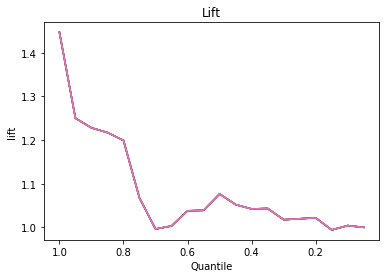

In [156]:
#Creating for loop to input data for lift curve. Prints out lift curve
for model in models:
    pyplot.plot(lifts["logistic"]["Quantile"], lifts["logistic"]["Lift"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")

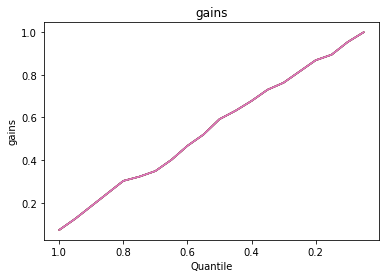

In [157]:
#Creating for loop to input data for lift curve. Prints out lift curve
for model in models:
    pyplot.plot(gains["logistic"]["Quantile"], gains["logistic"]["Cumulative gains"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("gains")
    pyplot.title("gains")

# Feature selection using Stepwise regression

In [158]:
def stepwiseRegresion (trainingSet, testSet, selectedFeatures, target):

    def computeAUC (forFeatures):
    
        model.fit(trainingSet[forFeatures], trainingSet[target])

        trainingSet["proba churn stepwise"] = DataFrame(model.predict_proba(trainingSet[forFeatures]))[1]
        testSet["proba churn stepwise"]     = DataFrame(model.predict_proba(testSet[forFeatures]))[1]

        aucTraining = roc_auc_score(array(trainingSet[target]),array(trainingSet["proba churn stepwise"]))
        aucTest     = roc_auc_score(array(testSet[target]),array(testSet["proba churn stepwise"]))

        trainingSet.drop("proba churn stepwise", axis = 1)
        testSet.drop("proba churn stepwise", axis = 1)

        return (forFeatures,aucTraining,aucTest)

    featuresOrder = []
    forwardSelection = []

    for step in range(len(selectedFeatures)):
        print(f"step {step+1}")
        aucs = []
        for feature in selectedFeatures:
            if feature not in featuresOrder:
                modelFeatures = featuresOrder.copy()
                modelFeatures.append(feature)
                aucs.append(computeAUC(modelFeatures))

        steps = DataFrame(aucs)
        steps.columns = ["Feature","AUC training", "AUC test"]
        steps = steps.sort_values(by=["AUC test"], ascending = False)

        featuresOrder = steps["Feature"].iloc[0]
        forwardSelection.append((step+1, steps["Feature"].iloc[0],steps["AUC training"].iloc[0],steps["AUC test"].iloc[0]))

    df = DataFrame(forwardSelection)
    df.columns = ("Step","Features","AUC Train","AUC Test")
    
    return df

In [159]:
#Every logically sound variable has been put in features

selectedFeatures = ['fl_donorID_is_missing_x', 'fl_gender_is_F',
       'fl_gender_is_M', 'fl_gender_is_S', 'fl_gender_is_U',
       'fl_language_is_N', 'fl_regionmap_is_Flanders',
       'fl_regionmap_is_Missing', 'fl_regionmap_is_Wallanio',
       'fl_regionmap_is_Wallonia', 'fl_provincemap_is_Brussels',
       'fl_provincemap_is_Flemish Brabant', 'fl_provincemap_is_Hainaut',
       'fl_provincemap_is_Liege', 'fl_provincemap_is_Limburg',
       'fl_provincemap_is_Luxembourg', 'fl_provincemap_is_Missing',
       'fl_provincemap_is_Namur', 'fl_provincemap_is_Walloon Brabant',
       'fl_provincemap_is_West Flanders', 
       'fl_campID_is_missing', 'fl_donorID_is_missing_y',
       'fl_amount_is_missing', 'MaxAmount', 'MinAmount', 'AvgAmount',
       'GiftsFrequency', 'Rdate', 'month','NoOfCampaigns','RMaxdate', 'RMindate'
             ]

# Running model (using selected features)

In [160]:
#model       = DecisionTreeClassifier()
#stepwiseRegresion(               trainingSet      = trainingSet, 
                                     #testSet          = validSet, 
                                     #selectedFeatures = selectedFeatures,
                                     #target           = target)

In [161]:
model       = LogisticRegression(solver = "lbfgs", max_iter = 500)
LR = stepwiseRegresion(               trainingSet      = trainingSet, 
                                     testSet          = validSet, 
                                     selectedFeatures = selectedFeatures,
                                     target           = target)

step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


step 20


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

step 21


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

step 22


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

step 23


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


step 24


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

step 25


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

step 26


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

step 27


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


step 28


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

step 29


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


step 30


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


step 31


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


step 32


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [162]:
print(LR)

    Step                                           Features  AUC Train  \
0      1                                    [NoOfCampaigns]   0.529045   
1      2   [NoOfCampaigns, fl_provincemap_is_West Flanders]   0.535756   
2      3  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.540397   
3      4  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.549838   
4      5  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.552064   
5      6  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.551936   
6      7  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.555098   
7      8  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.564089   
8      9  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.564337   
9     10  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.564442   
10    11  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.564412   
11    12  [NoOfCampaigns, fl_provincemap_is_West Flander...   0.564424   
12    13  [NoOfCampaigns, fl_provincem

In [163]:
selectedFeatures = LR.iloc[13, 1]
model.fit(trainingSet[selectedFeatures], trainingSet[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
#testSet = finaldata[finaldata['donorID'].isin(camp14['donorID'])]

In [165]:
selectedFeatures

['NoOfCampaigns',
 'fl_provincemap_is_West Flanders',
 'fl_provincemap_is_Brussels',
 'fl_gender_is_U',
 'MaxAmount',
 'fl_provincemap_is_Liege',
 'fl_regionmap_is_Wallonia',
 'fl_gender_is_S',
 'fl_provincemap_is_Namur',
 'fl_provincemap_is_Walloon Brabant',
 'fl_donorID_is_missing_x',
 'fl_donorID_is_missing_y',
 'fl_amount_is_missing',
 'GiftsFrequency']

In [166]:
y = DataFrame(model.predict_proba(validSet[selectedFeatures]))[1]

In [167]:
validSet['fdsfd'] = y
validSet

,donorID,Yamount,amount2013,fl_donorID_is_missing2013,fl_amount_is_missing2013,amount2014,fl_donorID_is_missing2014,fl_amount_is_missing2014,zipcode,region,...,Rdate,RMaxdate2013,RMaxdate,RMindate2013,RMindate,month2013,month,traintargetxx,proba churn stepwise,fdsfd
0,100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1861,Missing,...,2580,3872,4.151,4845,5.124,12,12,0,0.000000e+00,0.017126
1,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2260,13049A090,...,1224,945,1.224,945,1.224,9,9,0,5.228387e-148,0.014894
2,100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1780,Missing,...,2724,2445,2.724,4923,5.202,7,7,0,0.000000e+00,0.015369
3,100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,...,2472,3978,4.257,5168,5.447,4,4,0,4.481184e-297,0.010649
4,100010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020,Missing,...,1286,1007,1.286,1007,1.286,7,7,0,4.250965e-155,0.008517
5,100011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1090,Missing,...,1325,1046,1.325,1046,1.325,5,5,0,5.900707e-160,0.008628
6,100012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020,"2,10E+134",...,1169,890,1.169,890,1.169,10,10,0,2.291630e-141,0.008454
7,100018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030,Missing,...,1304,1025,1.304,1025,1.304,6,6,0,3.595771e-157,0.008454
8,100019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030,21015A36-,...,1114,1571,1.850,1571,1.850,12,12,0,7.870955e-135,0.008716
9,100021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030,21015A152,...,3455,3176,3.455,5752,6.031,7,7,0,0.000000e+00,0.009400


In [168]:
features = LR.iloc[13, 1]

In [169]:
trainingSet["proba don"] = DataFrame(model.predict_proba(trainingSet[features]))[1]
validSet["proba don"]     = DataFrame(model.predict_proba(validSet[features]))[1]

In [170]:
rocTraining = roc(dataSet = trainingSet, actuals =  target, probability = "proba don")
rocTest     = roc(dataSet = validSet,     actuals = target, probability = "proba don")

Text(0.5, 1.0, 'Receiver Operating Characteristic')

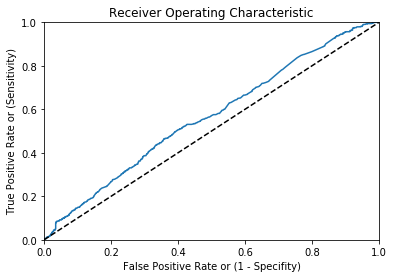

In [171]:
pyplot.plot(rocTraining["False positive rate"], rocTraining["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("Receiver Operating Characteristic")

In [172]:
ProbablityDataY2014jj =validSet.to_excel(r'C:/Users/xzong/Desktop/MBD/Descriptive and Predictive Modeling/GroupProject/yyyyyy.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/xzong/Desktop/MBD/Descriptive and Predictive Modeling/GroupProject/yyyyyy.xlsx'

In [ ]:
#model       = RandomForestClassifier(n_estimators = 100)
#RFC = (stepwiseRegresion(               trainingSet      = trainingSet, 
                                     #testSet          = validSet, 
                                     #selectedFeatures = selectedFeatures,
                                     #target           = target))

In [ ]:
print(RFC)

In [ ]:
#ProbablityData = testSet.to_csv(r'C:/Users/kfernandes/Desktop/Kripa Fernandes/Descriptive project/final.csv')

In [ ]:
#Boosted trees 

#model       = GradientBoostingClassifier()
#GBC = (stepwiseRegresion(               trainingSet      = trainingSet, 
                                     #testSet          = validSet, 
                                     #selectedFeatures = selectedFeatures,
                                     #target           = target))

#DataFrame(GBC)

In [ ]:
#model       = SVC(gamma = "scale", probability = True)
#stepwiseRegresion(               trainingSet      = trainingSet, 
                                     #testSet          = validSet, 
                                     #selectedFeatures = selectedFeatures,
                                     #target           = target)

In [ ]:
#model       = MLPClassifier()
#stepwiseRegresion(               trainingSet      = trainingSet, 
                                     #testSet          = validSet, 
                                     #selectedFeatures = selectedFeatures,
                                     #target           = target)

In [ ]:
#model       =KNeighborsClassifier()
#stepwiseRegresion(               trainingSet      = trainingSet, 
                                     #testSet          = validSet, 
                                     #selectedFeatures = selectedFeatures,
                                     #target           = target)

# Classification accuracy

In [ ]:
# Defining X and y

X = finaldata[selectedFeatures]

y = finaldata.testtarget

In [ ]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Training a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# Instantiating model
logreg = LogisticRegression()

# Fitting model
logreg.fit(X_train, y_train)

In [ ]:
# Making class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [ ]:
# Calculating accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
# Examining the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

In [ ]:
# Calculating the percentage of ones
# The y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

In [ ]:
# Calculating the percentage of zeros
1 - y_test.mean()

In [ ]:
model       = LogisticRegression(solver = "lbfgs", max_iter = 500)# Only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

# This means that a bad model that always predicts 0 would be right 99% of the time.
# However, the high percentage of 0s in the model shows that the accuracy is not a good indicator.

In [ ]:
# Calculating null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

In [ ]:
#Comparing True and Predicted response values

print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

# Confusion matrix

In [ ]:
# First argument is true values, second argument is predicted values
# This produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
# True negatives - Actual and predicted 0: 11087
# False positives - Actual 0, predicted 1: 0
# False negatives - Actual 1, predicted 0: 86
# True positives - Actual 1, predicted 1: 0

In [ ]:
# Prints the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

In [ ]:
# Saves confusion matrix and slices into four parts
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification accuracy based on the confusion matrix

In [ ]:
# Using float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
# Classification error: How often is the classifier wrong?

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
# Sensitivity: When is actual value is positive, how frequently is the prediction correct?

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

In [ ]:
# Specificity: When is actual value is negative, how frequently is the prediction correct?

specificity = TN / (TN + FP)

print(specificity)

In [ ]:
# Conclusion: Our model is highly specific but not senstive.

In [ ]:
# False Positive Rate: When the actual value is negative, how frequently is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

In [ ]:
# Precision: When a positive value is predicted, how frequently is the prediction correct?

In [ ]:
#precision = TP / float(TP + FP)

#print(precision)
#print(metrics.precision_score(y_test, y_pred_class))

## Adjusting the classification threshold

In [ ]:
# Print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

In [ ]:
# Print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

# Row: observation
## Each row, numbers sum to 1
# Column: class
## 2 response classes there 2 columns
## column 0: predicted probability that each observation is a member of class 0
## column 1: predicted probability that each observation is a member of class 1

In [ ]:
# Print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

In [ ]:
# Store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# Allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Adjust the font size 
plt.rcParams['font.size'] = 10

In [ ]:
# Histogram of predicted probabilities


#plt.hist(y_pred_prob, bins=5)


#plt.xlim(-1,1)
#plt.title('Histogram of predicted probabilities')
#plt.xlabel('Predicted probability of Donating')
#plt.ylabel('Frequency')

In [ ]:
## ROC Curve for evaluating thresholds

In [ ]:
# First argument is true values, second argument is predicted probabilities

# We pass y_test and y_pred_prob
# We do not use y_pred_class, because it will give incorrect results without generating an error
# Roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for donations classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
# Define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.5)

In [ ]:
evaluate_threshold(0.3)

# AUC 

In [ ]:
# First argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

In [ ]:
# Calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

# Clustering

In [ ]:
import sys

from pandas               import DataFrame
from pandas               import read_csv
from pandas               import to_numeric
from numpy                import array
from numpy                import random
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from sklearn.cluster      import KMeans
from sklearn.cluster      import AgglomerativeClustering
from matplotlib           import pyplot
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
from ieseg import partition
from ieseg import roc

In [ ]:
datac = finaldata[selectedFeatures]

In [ ]:
for (index,column) in enumerate(datac.columns):
    print(f"Column {index}: {column} \t min : {datac[column].min()} \t max : {datac[column].max()}")

# Hierarchical clustering

In [ ]:
hierarchy = AgglomerativeClustering(n_clusters         = None, 
                                    affinity           ="euclidean",
                                    linkage            = "average", 
                                    distance_threshold = 2)

In [ ]:
datac["hierarchy cluster"] = hierarchy.fit_predict(datac[["amount", "Rdate", "month"]])

In [ ]:
datac.head()

In [ ]:
clustersCount = len(datac["hierarchy cluster"].unique())